In [1]:
import keras
keras.__version__

'2.4.3'

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
from sklearn import preprocessing
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.utils import shuffle
from keras.applications.imagenet_utils import preprocess_input

In [3]:
import os, shutil
import pandas as pd

In [15]:
path = os.getcwd()
print(path)

/Users/ananta/Desktop/Masters Fall 2020/Deep Learning/Projects/Final Project


In [17]:
base_dir = path

# Directories for our training pictures
train_dir = os.path.join(base_dir, 'train')

# Labels
train_labels = pd.read_csv(base_dir + "/train.csv")

# Test Images List
test_images_list = pd.read_csv(base_dir + "/test.csv")

In [47]:
image_count = len(os.listdir(train_dir))
print(image_count)
samples = len(train_labels)
print (samples)
test_samples = len(test_images_list)
print (len(train_labels["image_name"]))
print (len(train_labels["label"]))

24335
17034
17034
17034


In [59]:
def process_images(train_labels, image_dir, samples, is_labelled = True):
    X_train = np.zeros((samples, 100, 100, 3))
    img_list = train_labels["image_name"]
    labels = train_labels["label"]
    
    idx = 0
    Y_train = [None for i in range(samples)]
    
    for i in range(len(img_list)):
        img_no = img_list[i]
        label = labels[i] if is_labelled else -1
        img = image.load_img(image_dir + "/" + img_no, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)
        X_train[idx] = x
        Y_train[idx] = label
        idx += 1 
        if (idx % 500 == 0):
            print ("Processing {} Label {}".format(img_no, label))
    
    Y_train = to_categorical(Y_train)
    return X_train, Y_train

In [60]:
X_train, Y_train = process_images(train_labels, train_dir, samples)

Processing 723.jpg Label 5
Processing 1443.jpg Label 2
Processing 2134.jpg Label 3
Processing 2856.jpg Label 4
Processing 3534.jpg Label 5
Processing 4264.jpg Label 4
Processing 5052.jpg Label 4
Processing 5730.jpg Label 3
Processing 6433.jpg Label 2
Processing 7138.jpg Label 0
Processing 7859.jpg Label 0
Processing 8590.jpg Label 2
Processing 9310.jpg Label 4
Processing 10024.jpg Label 2
Processing 10715.jpg Label 4
Processing 11407.jpg Label 5
Processing 12117.jpg Label 3
Processing 12789.jpg Label 0
Processing 13546.jpg Label 3
Processing 14258.jpg Label 4
Processing 14978.jpg Label 4
Processing 15673.jpg Label 0
Processing 16387.jpg Label 5
Processing 17120.jpg Label 2
Processing 17854.jpg Label 5
Processing 18551.jpg Label 2
Processing 19266.jpg Label 3
Processing 19995.jpg Label 1
Processing 20714.jpg Label 1
Processing 21442.jpg Label 4
Processing 22158.jpg Label 3
Processing 22854.jpg Label 1
Processing 23565.jpg Label 2
Processing 24280.jpg Label 5


In [61]:
X_train = X_train / 255.

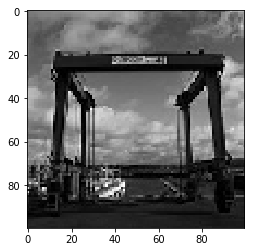

Label 4


In [85]:
plt.imshow(X_train[1])
plt.show()
print ("Label", np.argmax(Y_train[1], axis=0))

In [67]:
def process_test_images(test_images_list, image_dir, samples):
    X_train = np.zeros((samples, 100, 100, 3))
    idx = 0
    for img_no in test_images_list["image_name"]:
        img = image.load_img(image_dir + "/" + img_no, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)
        X_train[idx] = x
        idx += 1 
        if (idx % 500 == 0):
            print ("Processing {}".format(img_no))
    
    return X_train

In [68]:
X_test = process_test_images(test_images_list, train_dir, test_samples)

Processing 1655.jpg
Processing 3409.jpg
Processing 4836.jpg
Processing 6649.jpg
Processing 8282.jpg
Processing 9940.jpg
Processing 11729.jpg
Processing 13415.jpg
Processing 15040.jpg
Processing 16749.jpg
Processing 18362.jpg
Processing 20005.jpg
Processing 21625.jpg
Processing 23347.jpg


In [70]:
X_test = X_test / 255.

In [71]:
print (X_train.shape)
print (Y_train.shape)

print (X_test.shape)

(17034, 100, 100, 3)
(17034, 6)
(7301, 100, 100, 3)


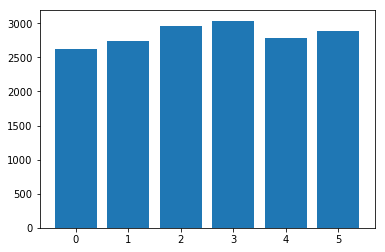

In [74]:
from collections import Counter
# Checking label distribution
_labels = np.argmax(Y_train, axis = 1)
counter = Counter(_labels)
plt.bar(list(counter.keys()), list(counter.values()))
plt.show()

In [86]:
# Shuffling
X_train, Y_train = shuffle(X_train, Y_train)

In [87]:
X_val = X_train[13035:]
Y_val = Y_train[13035:]

X_train = X_train[:13035]
Y_train = Y_train[:13035]

In [101]:
print ("X train shape", X_train.shape)
print ("Y train shape", Y_train.shape)

print ("X val shape", X_val.shape)
print ("Y val shape", Y_val.shape)

X train shape (13035, 100, 100, 3)
Y train shape (13035, 6)
X val shape (3999, 100, 100, 3)
Y val shape (3999, 6)


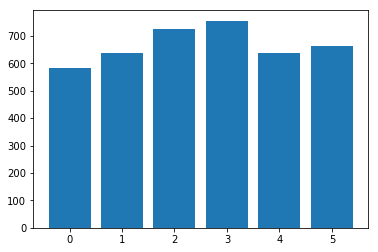

In [100]:
# Checking distribution in the validation set
from collections import Counter
# Checking label distribution
_labels = np.argmax(Y_val, axis = 1)
counter = Counter(_labels)
plt.bar(list(counter.keys()), list(counter.values()))
plt.show()

In [95]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='softmax'))
model.add(layers.Dense(Y_train.shape[1], activation='softmax'))

In [96]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['categorical_accuracy'])

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1692900   
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

In [98]:
# ANANTA: JUST A TRYOUT (NOT INTENDED TO BE A MODEL WE WANNA PUT IN HERE)
history = model.fit(X_train, 
                    Y_train, 
                    batch_size=100, 
                    epochs= 10,
                    steps_per_epoch=100,
                    validation_data=(X_val, Y_val))

Epoch 1/10
100/100 [==============================] - 39s 392ms/step - loss: 1.7403 - categorical_accuracy: 0.3529 - val_loss: 1.7093 - val_categorical_accuracy: 0.4214
Epoch 2/10
100/100 [==============================] - 34s 342ms/step - loss: 1.7024 - categorical_accuracy: 0.4232 - val_loss: 1.6917 - val_categorical_accuracy: 0.4509
Epoch 3/10
100/100 [==============================] - 35s 346ms/step - loss: 1.6827 - categorical_accuracy: 0.4503 - val_loss: 1.6797 - val_categorical_accuracy: 0.4471
Epoch 4/10
100/100 [==============================] - 32s 316ms/step - loss: 1.6744 - categorical_accuracy: 0.4525 - val_loss: 1.6666 - val_categorical_accuracy: 0.4649
Epoch 5/10
100/100 [==============================] - 32s 322ms/step - loss: 1.6624 - categorical_accuracy: 0.4676 - val_loss: 1.6621 - val_categorical_accuracy: 0.4759
Epoch 6/10
100/100 [==============================] - 32s 315ms/step - loss: 1.6558 - categorical_accuracy: 0.4671 - val_loss: 1.6495 - val_categorical_acc